### 1. Exploración de Datos:

**a. Cargar los datos:**
Para cargar los datos, generalmente utilizamos la biblioteca `pandas` en Python. Aquí hay un ejemplo de cómo cargar los datos de entrenamiento y prueba:

```python
import pandas as pd

# Cargar los datos
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Ver las primeras filas del conjunto de entrenamiento
print(train_data.head())
```

In [1]:
import pandas as pd

# Cargar los datos
train_data = pd.read_csv('../../data/train.csv')
test_data = pd.read_csv('../../data/test.csv')

# Ver las primeras filas del conjunto de entrenamiento
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



**b. Análisis exploratorio:**
Una vez que hayas cargado los datos, es útil obtener una visión general de ellos:

```python
# Información general sobre el conjunto de entrenamiento
print(train_data.info())

# Estadísticas descriptivas
print(train_data.describe())
```

In [2]:
# Información general sobre el conjunto de entrenamiento
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Estadísticas descriptivas
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Esto te dará una idea de las características disponibles, la cantidad de valores faltantes y algunas estadísticas básicas para las características numéricas.

**c. Visualización de datos:**
La visualización es una herramienta poderosa para entender los datos. Puedes usar la biblioteca `matplotlib` o `seaborn` para visualizar la distribución de las características y la relación entre ellas. Por ejemplo, para visualizar la tasa de supervivencia según el género:

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Tasa de supervivencia según el género')
plt.show()
```

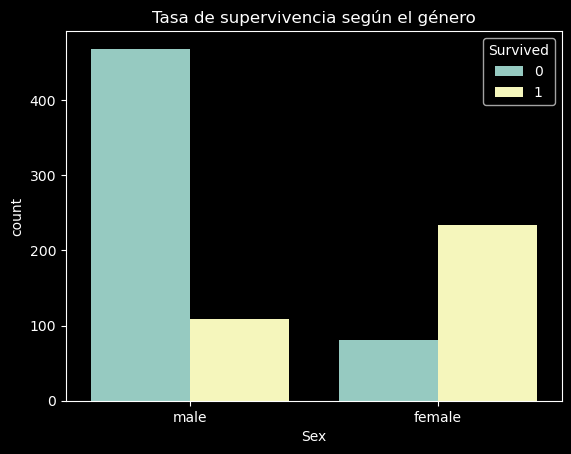

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Tasa de supervivencia según el género')
plt.show()


Estos son solo algunos pasos básicos para comenzar con la exploración de datos. A medida que profundices en el análisis, podrías descubrir patrones interesantes o relaciones que podrían ser útiles para la construcción del modelo.


¡Genial! Prosigamos con el **Preprocesamiento de Datos**.

### 2. Preprocesamiento de Datos:

**a. Manejo de valores faltantes:**
Es común encontrar valores faltantes en conjuntos de datos. Es esencial manejarlos adecuadamente para evitar errores en el modelo.

```python
# Verificar valores faltantes
print(train_data.isnull().sum())

# Una estrategia común es rellenar los valores faltantes de 'Age' con la mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Para 'Embarked', podemos rellenar con el valor más común
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
```

In [5]:
# Verificar valores faltantes
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Una estrategia común es rellenar los valores faltantes de 'Age' con la mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data["Age"].isnull().sum()

0

In [7]:
# Para 'Embarked', podemos rellenar con el valor más común
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
train_data["Embarked"].isnull().sum()

0

**b. Codificación de variables categóricas:**
Las máquinas entienden números, no texto. Por lo tanto, es necesario convertir las variables categóricas en formatos numéricos.

```python
# Convertir género a formato numérico: 0 para femenino y 1 para masculino
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Codificar 'Embarked' usando codificación one-hot
embarked_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data.drop('Embarked', axis=1, inplace=True)
```

In [8]:
# Convertir género a formato numérico: 0 para femenino y 1 para masculino
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [9]:
# Codificar 'Embarked' usando codificación one-hot
embarked_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data.drop('Embarked', axis=1, inplace=True)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


**c. Creación de nuevas características:**
A veces, combinar o derivar nuevas características puede mejorar el rendimiento del modelo.

```python
# Crear una nueva característica 'FamilySize' que combina 'SibSp' y 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
```

In [10]:
# Crear una nueva característica 'FamilySize' que combina 'SibSp' y 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


**d. Normalización o escala de características:**
Algunos modelos funcionan mejor cuando las características tienen una escala similar.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
```

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data[['Age', 'Fare']])

StandardScaler()

In [12]:
train_data[['Age', 'Fare']] = scaler.transform(train_data[['Age', 'Fare']])

In [13]:
train_data[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00



Estos son solo algunos pasos básicos para el preprocesamiento de datos. Dependiendo de la naturaleza de los datos y el modelo que elijas, es posible que necesites realizar más transformaciones.


### 3. Construcción del Modelo:

**a. Dividir el conjunto de entrenamiento:**
Antes de entrenar el modelo, es una buena práctica dividir el conjunto de entrenamiento en subconjuntos de entrenamiento y validación. Esto nos permite evaluar el rendimiento del modelo antes de hacer predicciones en el conjunto de prueba.

```python
from sklearn.model_selection import train_test_split

# Definir las características y la variable objetivo
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
```

In [14]:
from sklearn.model_selection import train_test_split

# Definir las características y la variable objetivo
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


**b. Seleccionar y entrenar un modelo inicial:**
Como punto de partida, podemos usar la Regresión Logística, que es un modelo simple pero efectivo para problemas de clasificación binaria. Comenzaremos desarrollando un modelos lineal y ajustando los resultados en el intervalo adecuado. 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el rendimiento
print(mean_absolute_error(y_val, y_pred))
print(mean_squared_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

0.2851455248860693
0.135074012314622
0.44299788564056586



```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el rendimiento
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
```

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el rendimiento
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8101



**c. Evaluar el rendimiento del modelo:**
Es esencial evaluar cómo se desempeña el modelo en datos no vistos. Además de la precisión, hay otras métricas que pueden ser relevantes, como el recall, la precisión y el AUC-ROC.

```python
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))
```

El `classification_report` de `sklearn.metrics` proporciona las principales métricas de clasificación para evaluar el rendimiento de un clasificador. Estas métricas incluyen:

1. **Precision (Precisión):** Esta métrica nos dice cuántos de los elementos identificados como positivos fueron realmente positivos. Es el cociente entre los verdaderos positivos y la suma de los verdaderos positivos y falsos positivos.
   
   $ \text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}} $

2. **Recall (Sensibilidad o Tasa Verdadera Positiva):** Esta métrica nos dice cuántos de los elementos que realmente eran positivos fueron identificados como tales. Es el cociente entre los verdaderos positivos y la suma de los verdaderos positivos y falsos negativos.
   
   $\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}$

3. **F1-score (Puntaje F1):** Es una métrica que combina la precisión y el recall en una única cifra. Es útil cuando se quiere tener un balance entre la precisión y el recall. El F1-score es la media armónica de la precisión y el recall.
   
    $ \text{F1-score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}} $

4. **Support (Soporte):** Indica la cantidad de observaciones reales para cada clase en el conjunto de datos de prueba.

El reporte también proporciona estas métricas para cada clase individualmente y promedios (macro, ponderado) para problemas de clasificación multiclase.

Un ejemplo de cómo se vería este reporte es:

```
              precision    recall  f1-score   support

      Clase1       0.89      0.85      0.87       100
      Clase2       0.80      0.84      0.82        80

   micro avg       0.85      0.85      0.85       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.85      0.85       180
```

Donde:

- **micro avg**: Calcula las métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
- **macro avg**: Calcula las métricas para cada etiqueta y encuentra su media no ponderada (sin tener en cuenta el soporte).
- **weighted avg**: Calcula las métricas para cada etiqueta y encuentra su media ponderada por soporte.

Este reporte te permite obtener rápidamente una visión general del rendimiento de tu clasificador, y entender mejor cómo se comporta en diferentes clases y en general.

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179




Estos pasos te proporcionan un modelo inicial y una evaluación básica de su rendimiento. A partir de aquí, puedes experimentar con diferentes modelos, ajustar hiperparámetros y realizar ingeniería de características adicional para mejorar el rendimiento.


### 4. Optimización:

**a. Ajuste de hiperparámetros:**
El ajuste de hiperparámetros puede mejorar significativamente el rendimiento de un modelo. Una técnica común es la búsqueda en cuadrícula.

In [18]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 0.1}


In [19]:

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de validación
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy con los mejores hiperparámetros: {accuracy:.4f}")

Accuracy con los mejores hiperparámetros: 0.7989



**b. Probar diferentes modelos:**
No te limites a un solo modelo. Es posible que otros modelos, como los árboles de decisión, bosques aleatorios o máquinas de soporte vectorial, funcionen mejor para tu conjunto de datos.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el rendimiento
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy del bosque aleatorio: {accuracy:.4f}")

Accuracy del bosque aleatorio: 0.8212


In [21]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179




**c. Ensamblar modelos:**
A veces, combinar las predicciones de varios modelos (ensamblaje) puede mejorar el rendimiento general.

```python
# Hacer predicciones con ambos modelos
y_pred_logistic = best_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

# Combinar las predicciones (votación mayoritaria)
y_pred_ensemble = (y_pred_logistic + y_pred_rf) > 1

accuracy = accuracy_score(y_val, y_pred_ensemble)
print(f"Accuracy del ensamblaje: {accuracy:.4f}")
```

In [22]:
# Hacer predicciones con ambos modelos
y_pred_logistic = best_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

# Combinar las predicciones (votación mayoritaria)
y_pred_ensemble = (y_pred_logistic + y_pred_rf) > 1

accuracy = accuracy_score(y_val, y_pred_ensemble)
print(f"Accuracy del ensamblaje: {accuracy:.4f}")

Accuracy del ensamblaje: 0.8101



Estos pasos te ayudarán a optimizar tu modelo y potencialmente mejorar su rendimiento. Una vez que estés satisfecho con el rendimiento del modelo, puedes entrenarlo con todo el conjunto de entrenamiento y hacer predicciones en el conjunto de prueba.


## XGBoost

In [23]:
import xgboost as xgb

# Entrenar un modelo de bosque aleatorio
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy


0.8044692737430168

In [24]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Avancemos con la **Evaluación Final** y la preparación del archivo de envío para Kaggle.

### 5. Evaluación Final:

**a. Entrenar el modelo final:**
Una vez que hayas seleccionado y optimizado tu modelo, es hora de entrenarlo con todo el conjunto de entrenamiento para aprovechar al máximo los datos disponibles.

```python
# Usando el modelo de bosque aleatorio como ejemplo
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)
```

In [25]:
# Usando el modelo de bosque aleatorio como ejemplo
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

RandomForestClassifier(random_state=42)


**b. Predecir las etiquetas para el conjunto de datos de prueba:**
Antes de hacer predicciones, asegúrate de que el conjunto de datos de prueba haya pasado por el mismo preprocesamiento que el conjunto de entrenamiento.

```python
# Preprocesar el conjunto de datos de prueba (asegúrate de aplicar las mismas transformaciones)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

# Hacer predicciones
test_predictions = final_model.predict(test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
```

In [26]:
# Preprocesar el conjunto de datos de prueba
passenger_ids = test_data['PassengerId']
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# Rellenar valores faltantes
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Convertir género a formato numérico
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Codificación One-Hot para 'Embarked'
embarked_dummies_test = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
test_data = pd.concat([test_data, embarked_dummies_test], axis=1)
test_data.drop('Embarked', axis=1, inplace=True)

# Crear la característica 'FamilySize'
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Escalar características
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

In [27]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_C    0
Embarked_Q    0
Embarked_S    0
FamilySize    0
dtype: int64

In [28]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Fare'].isnull().sum()

0

In [29]:

# Hacer predicciones
test_predictions = final_model.predict(test_data)



**c. Preparar un archivo de envío para Kaggle:**
Kaggle generalmente requiere que envíes tus predicciones en un formato específico. Para la competencia del Titanic, necesitas un archivo CSV con dos columnas: `PassengerId` y `Survived`.

```python
# Crear un DataFrame para el envío
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Guardar el DataFrame como un archivo CSV
submission.to_csv('submission.csv', index=False)
```

In [30]:
# Crear un DataFrame para el envío
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [31]:
# Guardar el DataFrame como un archivo CSV
submission.to_csv('submission.csv', index=False)


¡Listo! Ahora tienes un archivo `submission.csv` que puedes enviar a Kaggle y ver cómo se desempeña tu modelo en el conjunto de datos de prueba.

Es importante recordar que la competencia del Titanic en Kaggle es una excelente oportunidad para aprender y experimentar. No te desanimes si tu modelo no se encuentra en la parte superior de la tabla de clasificación. Lo más importante es el proceso de aprendizaje y la experiencia adquirida.
